In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")

In [4]:
df_raw = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

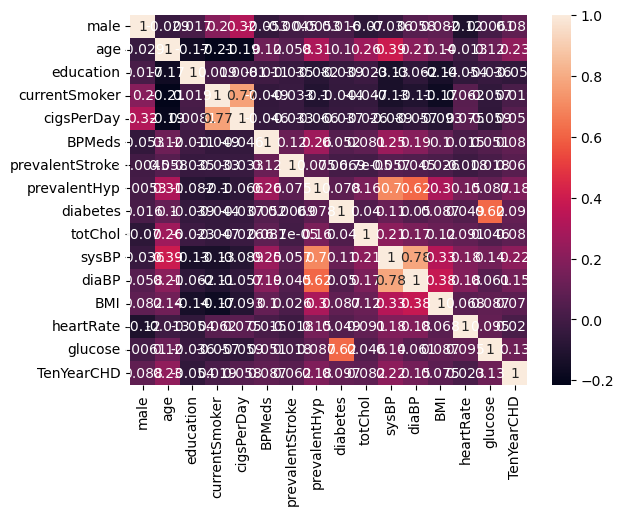

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [10]:
df['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [11]:
print(df['glucose'].unique())

[ 77.  76.  70. 103.  85.  99.  78.  79.  88.  61.  64.  84.  nan  72.
  89.  65. 113.  75.  83.  66.  74.  63.  87. 225.  90.  80. 100. 215.
  98.  62.  95.  94.  55.  82.  93.  73.  45. 202.  68.  97. 104.  96.
 126. 120. 105.  71.  56.  60. 117. 102.  58.  92. 109.  86. 107.  54.
  67.  69.  57.  91. 132. 150.  59.  81. 115. 140. 112. 118. 143. 114.
 160. 110. 123. 108. 145. 122. 137. 106. 127. 205. 130. 101.  47.  53.
 216. 163. 144. 116. 121. 172. 124. 111.  40. 186. 223. 325.  44. 156.
 268.  50. 274. 292. 255. 136. 206. 131. 148. 297.  43. 173.  48. 386.
 155. 147. 170.  52. 320. 254. 394. 270. 244. 183. 142. 119. 135. 167.
 207. 129. 177. 250. 294. 166. 125. 332. 368. 348. 248. 370. 193. 191.
 256. 235. 210. 260.]


In [12]:
sum= 0
for _ in range(len(df['glucose'].unique())):
    sum += _
print(sum/len(df['glucose'].unique()))

71.5


In [13]:
df['glucose'].mean()

81.96675324675324

In [14]:
df['BMI'].mean()

25.80200758473572

In [15]:
df['BMI'].mode()

0    22.19
1    22.54
2    22.91
3    23.48
dtype: float64

In [16]:
df['BMI'].median()

25.4

In [17]:
df['BMI'].value_counts()

22.19    18
22.54    18
23.48    18
22.91    18
23.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: BMI, Length: 1363, dtype: int64

In [18]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
df['BMI'].fillna(df['BMI'].mode(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [21]:
for i in range(len(df)):
    if df["BMI"].isna()[i]:
        print(df.iloc[i])
        print("-----------")

male                 0.0
age                 40.0
education            2.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
diabetes             0.0
totChol            205.0
sysBP              100.0
diaBP               60.0
BMI                  NaN
heartRate           60.0
glucose             72.0
TenYearCHD           1.0
Name: 97, dtype: float64
-----------
male                 0.0
age                 47.0
education            1.0
currentSmoker        1.0
cigsPerDay          25.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         1.0
diabetes             1.0
totChol            258.0
sysBP              195.0
diaBP               90.0
BMI                  NaN
heartRate           86.0
glucose              NaN
TenYearCHD           1.0
Name: 294, dtype: float64
-----------
male                 0.0
age                 45.0
education            3.0
currentSmoker        0.0
cigsPerDay           0.0


In [22]:
df.iloc[1]

male                 0.00
age                 46.00
education            2.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            250.00
sysBP              121.00
diaBP               81.00
BMI                 28.73
heartRate           95.00
glucose             76.00
TenYearCHD           0.00
Name: 1, dtype: float64

In [23]:
df.dropna(subset=["BMI"],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4219 non-null   int64  
 1   age              4219 non-null   int64  
 2   education        4115 non-null   float64
 3   currentSmoker    4219 non-null   int64  
 4   cigsPerDay       4190 non-null   float64
 5   BPMeds           4166 non-null   float64
 6   prevalentStroke  4219 non-null   int64  
 7   prevalentHyp     4219 non-null   int64  
 8   diabetes         4219 non-null   int64  
 9   totChol          4170 non-null   float64
 10  sysBP            4219 non-null   float64
 11  diaBP            4219 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4218 non-null   float64
 14  glucose          3836 non-null   float64
 15  TenYearCHD       4219 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 560.3 KB


In [25]:
df.isnull().sum()

male                 0
age                  0
education          104
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            383
TenYearCHD           0
dtype: int64

In [26]:
df.dropna(subset=["heartRate","education","cigsPerDay","BPMeds","totChol"],inplace=True)

In [27]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64

In [28]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022661,0.012988,0.201365,0.326439,-0.050024,-0.003618,0.007099,0.016915,-0.068606,-0.033550,0.058443,0.078999,-0.115639,0.003048,0.091301
age,-0.022661,1.000000,-0.160599,-0.213758,-0.190422,0.128390,0.045036,0.304913,0.104718,0.269356,0.390079,0.206722,0.134364,-0.008313,0.118245,0.229569
education,0.012988,-0.160599,1.000000,0.018366,0.006260,-0.010029,-0.028540,-0.081717,-0.034684,-0.022649,-0.128381,-0.063712,-0.136001,-0.058138,-0.031874,-0.053974
currentSmoker,0.201365,-0.213758,0.018366,1.000000,0.770785,-0.048925,-0.032537,-0.105285,-0.040233,-0.048969,-0.130845,-0.109655,-0.164752,0.051932,-0.053346,0.022244
cigsPerDay,0.326439,-0.190422,0.006260,0.770785,1.000000,-0.043958,-0.033948,-0.066404,-0.036184,-0.026239,-0.087924,-0.051174,-0.087372,0.067597,-0.053803,0.059259
BPMeds,-0.050024,0.128390,-0.010029,-0.048925,-0.043958,1.000000,0.127479,0.259707,0.047630,0.086113,0.260429,0.196103,0.102983,0.016325,0.054210,0.089835
prevalentStroke,-0.003618,0.045036,-0.028540,-0.032537,-0.033948,0.127479,1.000000,0.067315,0.009539,0.007950,0.055170,0.049318,0.031380,-0.012109,0.016051,0.044821
prevalentHyp,0.007099,0.304913,-0.081717,-0.105285,-0.066404,0.259707,0.067315,1.000000,0.075064,0.165329,0.693985,0.615394,0.304445,0.151672,0.087129,0.176389
diabetes,0.016915,0.104718,-0.034684,-0.040233,-0.036184,0.047630,0.009539,0.075064,1.000000,0.044473,0.101061,0.051326,0.082742,0.051474,0.614817,0.089268
totChol,-0.068606,0.269356,-0.022649,-0.048969,-0.026239,0.086113,0.007950,0.165329,0.044473,1.000000,0.214726,0.172057,0.122963,0.088371,0.049749,0.082359


In [29]:
df_raw.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [30]:
df2 = df

In [31]:
df["glucose"].mode()

0    75.0
dtype: float64

In [32]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3656.000000,3987.000000
mean,0.433158,49.478806,1.981941,0.491096,9.020316,0.029345,0.005518,0.309506,0.025332,236.620517,132.222724,82.861174,25.774650,75.873840,81.856127,0.149235
std,0.495574,8.531588,1.020696,0.499983,11.914558,0.168794,0.074087,0.462348,0.157152,44.019766,21.949243,11.882166,4.079846,12.087463,23.910128,0.356365
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.990000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [33]:
df["glucose"].value_counts()

75.0     180
77.0     166
70.0     150
73.0     146
83.0     145
        ... 
145.0      1
386.0      1
155.0      1
147.0      1
260.0      1
Name: glucose, Length: 138, dtype: int64

In [34]:
#df['glucose'].fillna(df['glucose'].mode(),inplace=True)
df['glucose'].fillna(78.0000,inplace=True)

In [35]:
df = df2.copy()
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022661,0.012988,0.201365,0.326439,-0.050024,-0.003618,0.007099,0.016915,-0.068606,-0.033550,0.058443,0.078999,-0.115639,0.006192,0.091301
age,-0.022661,1.000000,-0.160599,-0.213758,-0.190422,0.128390,0.045036,0.304913,0.104718,0.269356,0.390079,0.206722,0.134364,-0.008313,0.114921,0.229569
education,0.012988,-0.160599,1.000000,0.018366,0.006260,-0.010029,-0.028540,-0.081717,-0.034684,-0.022649,-0.128381,-0.063712,-0.136001,-0.058138,-0.030878,-0.053974
currentSmoker,0.201365,-0.213758,0.018366,1.000000,0.770785,-0.048925,-0.032537,-0.105285,-0.040233,-0.048969,-0.130845,-0.109655,-0.164752,0.051932,-0.051653,0.022244
cigsPerDay,0.326439,-0.190422,0.006260,0.770785,1.000000,-0.043958,-0.033948,-0.066404,-0.036184,-0.026239,-0.087924,-0.051174,-0.087372,0.067597,-0.051460,0.059259
BPMeds,-0.050024,0.128390,-0.010029,-0.048925,-0.043958,1.000000,0.127479,0.259707,0.047630,0.086113,0.260429,0.196103,0.102983,0.016325,0.053646,0.089835
prevalentStroke,-0.003618,0.045036,-0.028540,-0.032537,-0.033948,0.127479,1.000000,0.067315,0.009539,0.007950,0.055170,0.049318,0.031380,-0.012109,0.016134,0.044821
prevalentHyp,0.007099,0.304913,-0.081717,-0.105285,-0.066404,0.259707,0.067315,1.000000,0.075064,0.165329,0.693985,0.615394,0.304445,0.151672,0.084174,0.176389
diabetes,0.016915,0.104718,-0.034684,-0.040233,-0.036184,0.047630,0.009539,0.075064,1.000000,0.044473,0.101061,0.051326,0.082742,0.051474,0.609213,0.089268
totChol,-0.068606,0.269356,-0.022649,-0.048969,-0.026239,0.086113,0.007950,0.165329,0.044473,1.000000,0.214726,0.172057,0.122963,0.088371,0.048555,0.082359


In [36]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [37]:
#sns.pairplot(df)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3987 non-null   int64  
 1   age              3987 non-null   int64  
 2   education        3987 non-null   float64
 3   currentSmoker    3987 non-null   int64  
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   int64  
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  TenYearCHD       3987 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


In [44]:
predict1 = lr.predict(X_test)

In [45]:
lr.score(X_test, y_test)

0.8379281537176274